# Activity 2: Analyzing Different Scenarios and Generating the Appropriate Visualization

We'll be working with the 120 years of Olympic History dataset acquired by Randi Griffin from https://www.sports-reference.com/ and made available on the GitHub repository of this book. Your assignment is to identify the top five sports based on the largest number of medals awarded in the year 2016, and then perform the following analysis:

1.  Generate a plot indicating the number of medals awarded in each of the top five sports in 2016.
2.  Plot a graph depicting the distribution of the age of medal winners in the top five sports in 2016.
3.  Find out which national teams won the largest number of medals in the top five sports in 2016.
4.  Observe the trend in the average weight of male and female athletes winning in the top five sports in 2016.

## High-Level Steps

1.  Download the dataset and format it as a pandas DataFrame.
2.  Filter the DataFrame to only include the rows corresponding to medal winners from 2016.
3.  Find out the medals awarded in 2016 for each sport.
4.  List the top five sports based on the largest number of medals awarded. Filter the DataFrame one more time to only include the records for the top five sports in 2016.
5.  Generate a bar plot of record counts corresponding to each of the top five sports.
6.  Generate a histogram for the Age feature of all medal winners in the top five sports (2016).
7.  Generate a bar plot indicating how many medals were won by each country's team in the top five sports in 2016.
8.  Generate a bar plot indicating the average weight of players, categorized based on gender, winning in the top five sports in 2016.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("athlete_events.csv")

df_2016 = df[(df['Year'] == 2016) & (df['Medal'].notna())]
sport_counts_2016 = df_2016['Sport'].value_counts()
sport_counts_2016


Sport
Athletics                192
Swimming                 191
Rowing                   144
Football                 106
Hockey                    99
Handball                  89
Cycling                   84
Canoeing                  82
Water Polo                78
Rugby Sevens              74
Volleyball                72
Basketball                72
Wrestling                 72
Gymnastics                66
Fencing                   65
Judo                      56
Boxing                    51
Shooting                  45
Weightlifting             45
Sailing                   45
Equestrianism             45
Diving                    36
Taekwondo                 32
Synchronized Swimming     32
Archery                   24
Badminton                 24
Table Tennis              24
Tennis                    24
Rhythmic Gymnastics       18
Beach Volleyball          12
Triathlon                  6
Modern Pentathlon          6
Trampolining               6
Golf                       6
Name: co

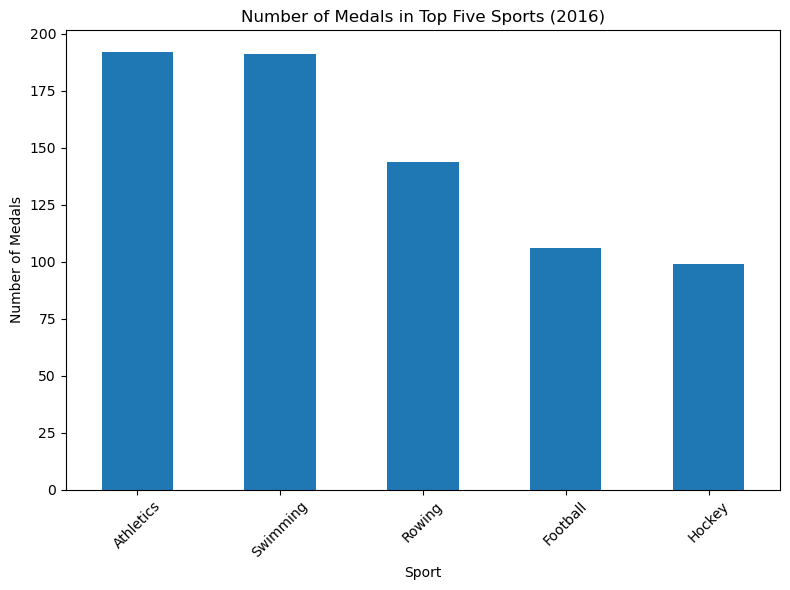

In [6]:
top_5_sports = sport_counts_2016.head(5).index.tolist()
df_top5_2016 = df_2016[df_2016['Sport'].isin(top_5_sports)]
plt.figure(figsize=(8, 6))
df_top5_2016['Sport'].value_counts().plot(kind='bar')
plt.title("Number of Medals in Top Five Sports (2016)")
plt.xlabel("Sport")
plt.ylabel("Number of Medals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

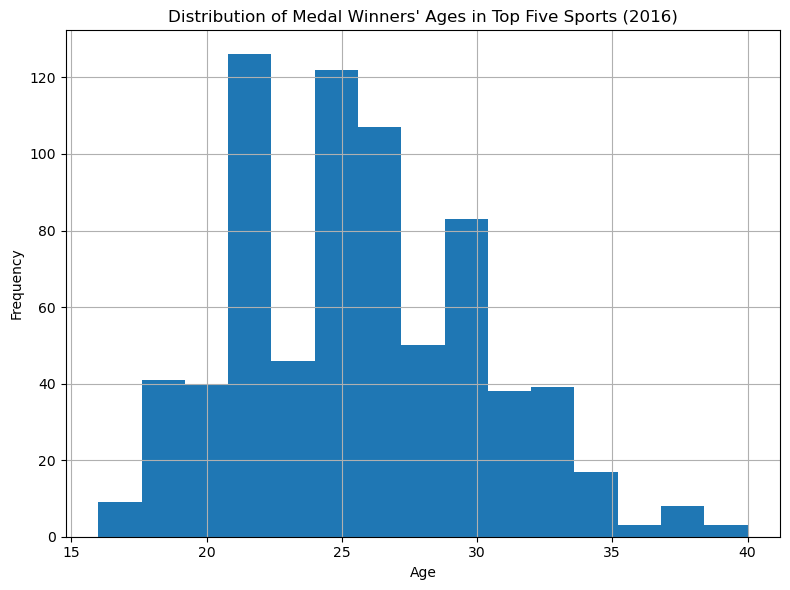

In [7]:
plt.figure(figsize=(8, 6))
df_top5_2016['Age'].hist(bins=15)  # You can adjust `bins` as desired
plt.title("Distribution of Medal Winners' Ages in Top Five Sports (2016)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

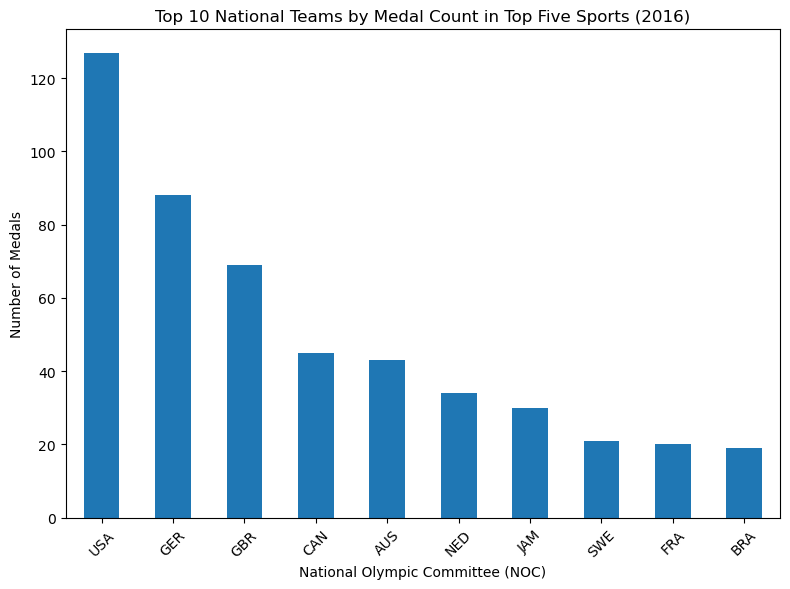

In [8]:
team_medal_counts = df_top5_2016['NOC'].value_counts()
top_10_teams = team_medal_counts.head(10)

plt.figure(figsize=(8, 6))
top_10_teams.plot(kind='bar')
plt.title("Top 10 National Teams by Medal Count in Top Five Sports (2016)")
plt.xlabel("National Olympic Committee (NOC)")
plt.ylabel("Number of Medals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
avg_weight = df_top5_2016.groupby(['Sport', 'Sex'])['Weight'].mean().reset_index()
pivot_weight = avg_weight.pivot(index='Sport', columns='Sex', values='Weight')
plt.figure(figsize=(8, 6))